  # Предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год по тарифам смарт и ультра. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше смарт тариф или ультра как для Москвы так и для других городов.

1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


1. Вывод - таблицы представленные ошибок не имели, имеются таблицы с информацией по использованию пользователями количества отправленных сообщений, сделанных звонков и потраченных Мб интренета в заисимости от тарифа за 2018 год.

2. Подготовьте данные

    2.1 Поиск пропусков

In [8]:
calls.rename(columns={'duration': 'time_calls'}, inplace=True)

display(calls)

,id,call_date,time_calls,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [9]:
display(calls.isna().sum())

id            0
call_date     0
time_calls    0
user_id       0
dtype: int64

In [10]:
display(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [11]:
display(internet.isna().sum())

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

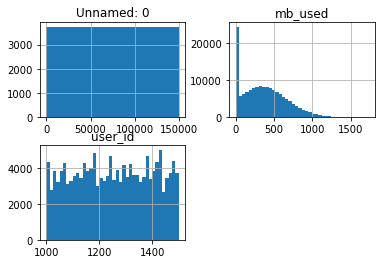

In [12]:
internet.hist(bins=40)
plt.show()

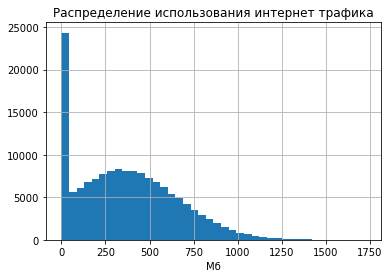

In [13]:
internet['mb_used'].hist(bins=40)
plt.xlabel('Мб')
plt.title('Распределение использования интернет трафика')
plt.show()

По таблице internet - Unnamed: 0  - столбец дублирует id, его удаляем, а вот по солбцу mb_used - видно что есть скашивающие значения в 0, немного но есть.

In [14]:
sms.rename(columns={'id': 'number_sms'}, inplace=True)

display(sms)

,number_sms,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [15]:
display(sms.isna().sum())

number_sms      0
message_date    0
user_id         0
dtype: int64

In [16]:
display(tarif)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
display(tarif.isna().sum())

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [18]:
display(user)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [19]:
display(user.isna().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [20]:
display(user.duplicated().sum())

0

churn_date - поле действия тарифа,если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Оставлю пол так как и есть.

    2.2 Приведите данные к нужным типам

In [21]:
calls['id']= calls['id'].astype('int32')
calls['call_date']= calls['call_date'].astype('datetime64')

In [22]:
internet['id']= internet['id'].astype('int32')
internet['session_date']= internet['session_date'].astype('datetime64')


Unnamed: 0 - повторяет счетчик id, столб просто удалю.

In [23]:
internet.drop('Unnamed: 0', axis=1, inplace=True)
internet.info()
display(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  int32         
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 4.0 MB


,id,mb_used,session_date,user_id
0,10000,112.95,2018-11-25,1000
1,10001,1052.81,2018-09-07,1000
2,10002,1197.26,2018-06-25,1000
3,10003,550.27,2018-08-22,1000
4,10004,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499152,318.90,2018-10-03,1499
149392,1499153,490.13,2018-12-14,1499
149393,1499154,0.00,2018-10-27,1499
149394,1499155,1246.32,2018-11-26,1499


In [24]:
sms['number_sms']= sms['number_sms'].astype('int32')
sms['message_date']= sms['message_date'].astype('datetime64')

In [25]:
user['churn_date']= user['churn_date'].astype('datetime64')
user['reg_date']= user['reg_date'].astype('datetime64')

    2.3 Найдите и исправьте ошибки в данных, если они есть.

In [26]:
display(user)
user['user_id'].value_counts().sum()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


500

2.1-2.2 Вывод

Вывод - ошибка в интернет трафике- пользователь устанавливал соединение и авторизовался. Но трафик нулевой. И это аномалия, возможно, что она связана с техничесткими проблемами оператора., если не считать лишнего сстобца в таблице intenet c дублиющим столбцом id, тип данных изменил.


    2.3 Посчитайте для каждого пользователя:

2.3.1 Количество сделанных звонков и израсходованных минут разговора по месяцам;

In [27]:
calls['monat'] = pd.to_datetime(calls['call_date']).dt.month
sms['monat'] = pd.to_datetime(sms['message_date']).dt.month
internet['monat'] = pd.to_datetime(internet['session_date']).dt.month

In [28]:

calls['time_calls']=np.ceil(calls['time_calls'])

In [29]:
calls_msgs_data = calls.merge(sms, on=['user_id', 'monat'], suffixes=['_calls', '_message'])
display(calls_msgs_data)

,id,call_date,time_calls,user_id,monat,number_sms,message_date
0,10000,2018-07-25,0.0,1000,7,100011,2018-07-06
1,10000,2018-07-25,0.0,1000,7,100018,2018-07-07
2,10000,2018-07-25,0.0,1000,7,100022,2018-07-29
3,10000,2018-07-25,0.0,1000,7,100026,2018-07-29
4,10000,2018-07-25,0.0,1000,7,100027,2018-07-30
...,...,...,...,...,...,...,...
8440792,1499173,2018-09-27,0.0,1499,9,1499143,2018-09-27
8440793,1499173,2018-09-27,0.0,1499,9,1499162,2018-09-29
8440794,1499173,2018-09-27,0.0,1499,9,1499170,2018-09-29
8440795,1499173,2018-09-27,0.0,1499,9,1499180,2018-09-28


In [30]:
calls_data_grouped = calls.pivot_table(index=['user_id', 'monat'], values='time_calls',
                                                   aggfunc=['sum', 'count'])
internet_data_grouped = internet.pivot_table(index=['user_id', 'monat'], values='mb_used',
                                                   aggfunc=['sum'])
display(calls_data_grouped)

sum      count
              time_calls time_calls
user_id monat                      
1000    5          159.0         22
        6          172.0         43
        7          340.0         47
        8          408.0         52
        9          466.0         58
...                  ...        ...
1498    10         247.0         41
1499    9           70.0          9
        10         449.0         68
        11         612.0         74
        12         492.0         69

[3174 rows x 2 columns]

In [31]:
calls_data_grouped.reset_index()
calls_data_grouped.columns = ['calls_duration', 'calls_amount']
display(calls_data_grouped)

calls_duration  calls_amount
user_id monat                              
1000    5               159.0            22
        6               172.0            43
        7               340.0            47
        8               408.0            52
        9               466.0            58
...                       ...           ...
1498    10              247.0            41
1499    9                70.0             9
        10              449.0            68
        11              612.0            74
        12              492.0            69

[3174 rows x 2 columns]

In [32]:
internet_data_grouped.columns = ['mb_used']
internet_data_grouped.reset_index()

,user_id,monat,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [33]:
internet_data_grouped['gb_used']=internet_data_grouped['mb_used']/1024
internet_data_grouped['gb_used']=np.ceil(internet_data_grouped['gb_used'])
display(internet_data_grouped)

mb_used  gb_used
user_id monat                   
1000    5       2253.49      3.0
        6      23233.77     23.0
        7      14003.64     14.0
        8      14055.93     14.0
        9      14568.91     15.0
...                 ...      ...
1498    10     20579.36     21.0
1499    9       1845.75      2.0
        10     17788.51     18.0
        11     17963.31     18.0
        12     13055.58     13.0

[3203 rows x 2 columns]

In [34]:
messages_data_grouped = sms.pivot_table(index=['user_id', 'monat'], values='number_sms', aggfunc='count')
messages_data_grouped.reset_index()
messages_data_grouped.columns=['messages_amount']
display(messages_data_grouped)

messages_amount
user_id monat                 
1000    5                   22
        6                   60
        7                   75
        8                   81
        9                   57
...                        ...
1498    10                  42
1499    9                   11
        10                  48
        11                  59
        12                  66

[2717 rows x 1 columns]

In [35]:
calls_internet_merged = calls_data_grouped.merge(internet_data_grouped, on=['user_id', 'monat'], how='left')
telecom_data = calls_internet_merged.merge(messages_data_grouped, on=['user_id', 'monat'], how='left')
telecom_data_pvt = telecom_data.pivot_table(index=['user_id', 'monat'])
telecom_data_pvt=telecom_data_pvt.reset_index()


In [36]:
display(telecom_data_pvt)

,user_id,monat,calls_amount,calls_duration,gb_used,mb_used,messages_amount
0,1000,5,22,159.0,3.0,2253.49,22.0
1,1000,6,43,172.0,23.0,23233.77,60.0
2,1000,7,47,340.0,14.0,14003.64,75.0
3,1000,8,52,408.0,14.0,14055.93,81.0
4,1000,9,58,466.0,15.0,14568.91,57.0
...,...,...,...,...,...,...,...
3169,1498,10,41,247.0,21.0,20579.36,42.0
3170,1499,9,9,70.0,2.0,1845.75,11.0
3171,1499,10,68,449.0,18.0,17788.51,48.0
3172,1499,11,74,612.0,18.0,17963.31,59.0


Добавим к telecom_data информацию о пользователях (предварительно приведя в формат datetime дату регистрации)
 
В таблице total_data увидим помесячно кол-во и длительность звонков, кол-во сообщений и объем использованного трафика для каждого пользователя

In [37]:
user['reg_date'] = pd.to_datetime(user['reg_date'], format='%Y-%m-%d')
user['churn_date'].fillna('2019-01-01', inplace=True) 
#если дата ухода клиента отстутствует, делаем вывод, что хотя бы в янв 2019 он остался
 
user['churn_date'] = pd.to_datetime(user['churn_date'], format='%Y-%m-%d')
total_data = telecom_data_pvt.merge(user, on='user_id',how='right').pivot_table(
    index=['user_id', 'first_name', 'last_name', 'age', 'city', 'tariff', 'reg_date', 'churn_date', 'monat'])
total_data = total_data.reset_index()

In [38]:
display(total_data)

,user_id,first_name,last_name,age,city,tariff,reg_date,churn_date,monat,calls_amount,calls_duration,gb_used,mb_used,messages_amount
0,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,5.0,22.0,159.0,3.0,2253.49,22.0
1,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,6.0,43.0,172.0,23.0,23233.77,60.0
2,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,7.0,47.0,340.0,14.0,14003.64,75.0
3,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,8.0,52.0,408.0,14.0,14055.93,81.0
4,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,9.0,58.0,466.0,15.0,14568.91,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,Всеволод,Акимчин,68,Владикавказ,smart,2018-07-19,2018-10-25,10.0,41.0,247.0,21.0,20579.36,42.0
3170,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,9.0,9.0,70.0,2.0,1845.75,11.0
3171,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,10.0,68.0,449.0,18.0,17788.51,48.0
3172,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,11.0,74.0,612.0,18.0,17963.31,59.0


In [39]:
total_data['user_id'].value_counts().sum()

3174

In [40]:
telecom_data_pvt.user_id.unique().shape

(492,)

In [41]:
temp = user.copy()
temp[(temp.user_id ==  1128) | (temp.user_id ==  1371)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [42]:
def out_lim(row):
    if row['tariff'] == 'smart':
        if row['messages_amount'] > 50:
            messages_extra = (row['messages_amount'] - 50)*3
        else:
            messages_extra = 0
        if row['calls_amount'] > 500:
            calls_extra = (row['calls_amount'] - 500)*3
        else:
            calls_extra = 0
        if row['gb_used'] > 15:
            gb_extra = (row['gb_used'] - 15)*200
        else:
            gb_extra = 0
        total_cost = messages_extra + calls_extra + gb_extra + 550
    if row['tariff'] == 'ultra':
        if row['messages_amount'] > 1000:
            messages_extra = (row['messages_amount'] - 1000)*1
        else:
            messages_extra = 0
        if row['calls_amount'] > 3900:
            calls_extra = (row['calls_amount'] - 3000)*1
        else:
            calls_extra = 0
        if row['gb_used'] > 30:
            gb_extra = (row['gb_used'] - 30)*150
        else:
            gb_extra = 0
        total_cost = messages_extra + calls_extra + gb_extra + 1950
    return total_cost
 
total_data['total_cost'] = total_data.apply(out_lim, axis=1)
total_data.pivot_table(index=['user_id', 'first_name', 'last_name', 'age', 'city', 'tariff', 'reg_date', 'churn_date', 'monat'])

calls_amount  \
user_id first_name last_name age city        tariff reg_date   churn_date monat                 
1000    Рафаил     Верещагин 52  Краснодар   ultra  2018-05-25 2019-01-01 5.0            22.0   
                                                                          6.0            43.0   
                                                                          7.0            47.0   
                                                                          8.0            52.0   
                                                                          9.0            58.0   
...                                                                                       ...   
1498    Всеволод   Акимчин   68  Владикавказ smart  2018-07-19 2018-10-25 10.0           41.0   
1499    Гектор     Корнилов  35  Пермь       smart  2018-09-27 2019-01-01 9.0             9.0   
                                                                          10.0           68.0   
                                                                          11.0           74.0   
                                                                          12.0           69.0   

                                                                                 calls_duration  \
user_id first_name last_name age city        tariff reg_date   churn_date monat                   
1000    Рафаил     Верещагин 52  Краснодар   ultra  2018-05-25 2019-01-01 5.0             159.0   
                                                                          6.0             172.0   
                                                                          7.0             340.0   
                                                                          8.0             408.0   
                                                                          9.0             466.0   
...                                                                                         ...   
1498    Всеволод   Акимчин   68  Владикавказ smart  2018-07-19 2018-10-25 10.0            247.0   
1499    Гектор     Корнилов  35  Пермь       smart  2018-09-27 2019-01-01 9.0              70.0   
                                                                          10.0            449.0   
                                                                          11.0            612.0   
                                                                          12.0            492.0   

                                                                                 gb_used  \
user_id first_name last_name age city        tariff reg_date   churn_date monat            
1000    Рафаил     Верещагин 52  Краснодар   ultra  2018-05-25 2019-01-01 5.0        3.0   
                                                                          6.0       23.0   
                                                                          7.0       14.0   
                                                                          8.0       14.0   
                                                                          9.0       15.0   
...                                                                                  ...   
1498    Всеволод   Акимчин   68  Владикавказ smart  2018-07-19 2018-10-25 10.0      21.0   
1499    Гектор     Корнилов  35  Пермь       smart  2018-09-27 2019-01-01 9.0        2.0   
                                                                          10.0      18.0   
                                                                          11.0      18.0   
                                                                          12.0      13.0   

                                                                                  mb_used  \
user_id first_name last_name age city        tariff reg_date   churn_date monat             
1000    Рафаил     Верещагин 52  Краснодар   ultra  2018-05-25 2019-01-01 5.0     2253.49   
                                                       

In [43]:
display(total_data)

,user_id,first_name,last_name,age,city,tariff,reg_date,churn_date,monat,calls_amount,calls_duration,gb_used,mb_used,messages_amount,total_cost
0,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,5.0,22.0,159.0,3.0,2253.49,22.0,1950.0
1,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,6.0,43.0,172.0,23.0,23233.77,60.0,1950.0
2,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,7.0,47.0,340.0,14.0,14003.64,75.0,1950.0
3,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,8.0,52.0,408.0,14.0,14055.93,81.0,1950.0
4,1000,Рафаил,Верещагин,52,Краснодар,ultra,2018-05-25,2019-01-01,9.0,58.0,466.0,15.0,14568.91,57.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,Всеволод,Акимчин,68,Владикавказ,smart,2018-07-19,2018-10-25,10.0,41.0,247.0,21.0,20579.36,42.0,1750.0
3170,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,9.0,9.0,70.0,2.0,1845.75,11.0,550.0
3171,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,10.0,68.0,449.0,18.0,17788.51,48.0,1150.0
3172,1499,Гектор,Корнилов,35,Пермь,smart,2018-09-27,2019-01-01,11.0,74.0,612.0,18.0,17963.31,59.0,1177.0


In [44]:
total_data.isna().sum()

user_id              0
first_name           0
last_name            0
age                  0
city                 0
tariff               0
reg_date             0
churn_date           0
monat                0
calls_amount         0
calls_duration       0
gb_used             11
mb_used             11
messages_amount    496
total_cost           0
dtype: int64

Пропуски имеются в столбцах messages_amount и  gb_used, данных по всей видимости просто нет, не внесли их либо по ошибке либо из-за того что пользователи либо не использовли интернет или не писали смс, пропуски заменю на 0.              

In [45]:
total_data['gb_used']=total_data['gb_used'].fillna(0)
total_data['messages_amount']=total_data['messages_amount'].fillna(0)
total_data.drop(['mb_used'], axis=1, inplace=True)


In [46]:
total_data.isna().sum()

user_id            0
first_name         0
last_name          0
age                0
city               0
tariff             0
reg_date           0
churn_date         0
monat              0
calls_amount       0
calls_duration     0
gb_used            0
messages_amount    0
total_cost         0
dtype: int64

2.3.4 Помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

2. Вывод - в представленных таблицах приведение типов данных произвел.
    Посчитал для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя - она указано в столбце total_cost таблицы total_data

3. Проанализируйте данные

- Опишите поведение клиентов оператора, исходя из выборки.

     3.1 Сколько минут разговора требуется пользователям каждого тарифа в месяц?

Тариф смарт и еге зависимость. Телефонные звонки

In [47]:
min_total_data_smart = total_data.query('tariff=="smart"').pivot_table(index=['tariff', 'monat'], values='calls_amount', aggfunc=['sum','median' ,'mean'])
min_total_data_ultra = total_data.query('tariff=="ultra"').pivot_table(index=['tariff', 'monat'], values='calls_amount', aggfunc=['sum','median' ,'mean'])

In [48]:
display(min_total_data_smart)
display(min_total_data_ultra)

sum       median         mean
             calls_amount calls_amount calls_amount
tariff monat                                       
smart  1.0          941.0         20.5    27.676471
       2.0         2331.0         38.5    40.189655
       3.0         4183.0         59.0    54.324675
       4.0         5747.0         52.0    51.312500
       5.0         7789.0         59.0    55.241135
       6.0         9110.0         59.0    55.889571
       7.0        11402.0         58.0    56.726368
       8.0        13860.0         62.5    59.230769
       9.0        15482.0         61.0    59.776062
       10.0       17629.0         61.0    60.167235
       11.0       19435.0         60.0    61.698413
       12.0       22406.0         65.5    66.684524

sum       median         mean
             calls_amount calls_amount calls_amount
tariff monat                                       
ultra  1.0          535.0         51.0    59.444444
       2.0          997.0         25.0    41.541667
       3.0         2504.0         57.0    67.675676
       4.0         3525.0         63.0    66.509434
       5.0         4858.0         76.5    75.906250
       6.0         5606.0         69.0    69.209877
       7.0         6896.0         79.0    78.363636
       8.0         7628.0         74.0    74.058252
       9.0         8579.0         77.0    77.288288
       10.0        9517.0         76.5    80.652542
       11.0       10066.0         80.0    78.031008
       12.0       11581.0         84.0    86.425373

In [49]:
total_data_smart=total_data.query('tariff=="smart"')
total_data_ultra=total_data.query('tariff=="ultra"')

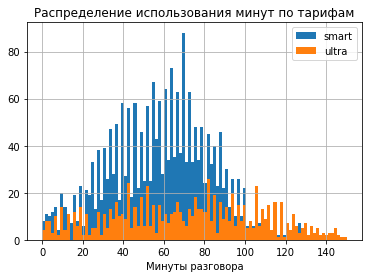

In [50]:
total_data_smart['calls_amount'].hist(range=(0,150),bins=100, label='smart')
total_data_ultra['calls_amount'].hist(range=(0,150),bins=100, label='ultra')
plt.xlabel('Минуты разговора')
plt.title('Распределение использования минут по тарифам')
plt.legend()
plt.show()

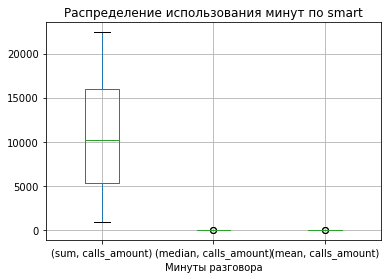

,sum,median,mean
,calls_amount,calls_amount,calls_amount
count,12.000000,12.000000,12.000000
mean,10859.583333,54.666667,54.076448
std,6991.330924,12.758835,10.541593
min,941.000000,20.500000,27.676471
25%,5356.000000,56.500000,53.571631
50%,10256.000000,59.000000,56.307969
75%,16018.750000,61.000000,59.873855
max,22406.000000,65.500000,66.684524


In [51]:
min_total_data_smart.boxplot()
plt.xlabel('Минуты разговора')
plt.title('Распределение использования минут по smart')
plt.show()
min_total_data_smart.describe()

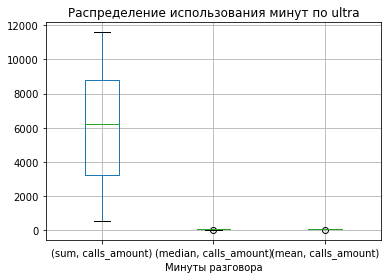

,sum,median,mean
,calls_amount,calls_amount,calls_amount
count,12.000000,12.000000,12.000000
mean,6024.333333,67.666667,71.258871
std,3628.796653,16.695581,11.842449
min,535.000000,25.000000,41.541667
25%,3269.750000,61.500000,67.384115
50%,6251.000000,75.250000,74.982251
75%,8813.500000,77.500000,78.114165
max,11581.000000,84.000000,86.425373


In [52]:
min_total_data_ultra.boxplot()
plt.xlabel('Минуты разговора')
plt.title('Распределение использования минут по ultra')
plt.show()
min_total_data_ultra.describe()


In [53]:
display(min_total_data_ultra.var()['median'])
display(min_total_data_ultra.var()['mean'])
display(min_total_data_ultra.var()['sum'])

calls_amount    278.742424
dtype: float64

calls_amount    140.243604
dtype: float64

calls_amount    1.316817e+07
dtype: float64

     3.2 Сколько  сколько сообщений  требуется пользователям каждого тарифа в месяц?

In [54]:
sms_total_data_smart = total_data.query('tariff=="smart"').pivot_table(index=['tariff', 'monat'], values='messages_amount', aggfunc=['sum','median' ,'mean'])
sms_total_data_ultra = total_data.query('tariff=="ultra"').pivot_table(index=['tariff', 'monat'], values='messages_amount', aggfunc=['sum','median' ,'mean'])

In [55]:
display(sms_total_data_smart)
display(sms_total_data_ultra)

sum          median            mean
             messages_amount messages_amount messages_amount
tariff monat                                                
smart  1.0             620.0            15.0       18.235294
       2.0            1397.0            20.0       24.086207
       3.0            2453.0            23.0       31.857143
       4.0            3443.0            28.0       30.741071
       5.0            4762.0            30.0       33.773050
       6.0            5430.0            28.0       33.312883
       7.0            6784.0            29.0       33.751244
       8.0            7888.0            27.5       33.709402
       9.0            8714.0            30.0       33.644788
       10.0           9906.0            30.0       33.808874
       11.0          10748.0            28.0       34.120635
       12.0          12095.0            29.0       35.997024

sum          median            mean
             messages_amount messages_amount messages_amount
tariff monat                                                
ultra  1.0             304.0            32.0       33.777778
       2.0             527.0             5.5       21.958333
       3.0            1195.0            20.0       32.297297
       4.0            1727.0            18.0       32.584906
       5.0            2423.0            23.5       37.859375
       6.0            3244.0            27.0       40.049383
       7.0            4266.0            39.0       48.477273
       8.0            4930.0            40.0       47.864078
       9.0            5751.0            46.0       51.810811
       10.0           6899.0            52.0       58.466102
       11.0           7224.0            45.0       56.000000
       12.0           8141.0            52.5       60.753731

In [56]:
total_data_smart=total_data.query('tariff=="smart"')
total_data_ultra=total_data.query('tariff=="ultra"')

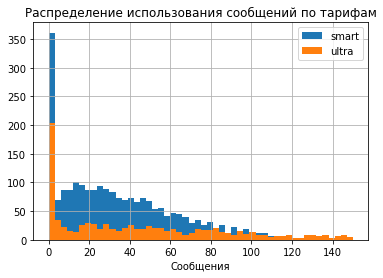

In [57]:
total_data_smart['messages_amount'].hist(range=(0,150),bins=50,label='smart')
total_data_ultra['messages_amount'].hist(range=(0,150),bins=50, label='ultra')
plt.xlabel('Сообщения')
plt.title('Распределение использования сообщений по тарифам')
plt.legend()
plt.show()

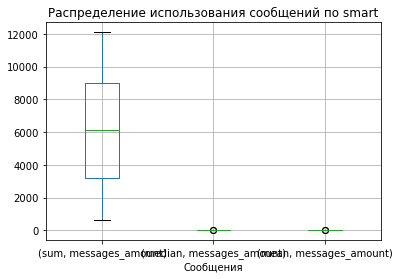

,sum,median,mean
,messages_amount,messages_amount,messages_amount
count,12.000000,12.000000,12.000000
mean,6186.666667,26.458333,31.419801
std,3780.154382,4.707143,5.107641
min,620.000000,15.000000,18.235294
25%,3195.500000,26.375000,31.578125
50%,6107.000000,28.000000,33.677095
75%,9012.000000,29.250000,33.782006
max,12095.000000,30.000000,35.997024


In [58]:
sms_total_data_smart.boxplot()
plt.xlabel('Cообщения')
plt.title('Распределение использования сообщений по smart')
plt.show()
sms_total_data_smart.describe()

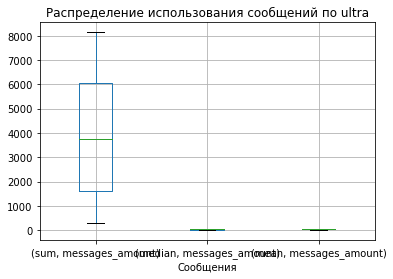

,sum,median,mean
,messages_amount,messages_amount,messages_amount
count,12.000000,12.000000,12.000000
mean,3885.916667,33.375000,43.491589
std,2723.749069,14.817258,12.201866
min,304.000000,5.500000,21.958333
25%,1594.000000,22.625000,33.479560
50%,3755.000000,35.500000,43.956730
75%,6038.000000,45.250000,52.858108
max,8141.000000,52.500000,60.753731


In [59]:
sms_total_data_ultra.boxplot()
plt.xlabel('Cообщения')
plt.title('Распределение использования сообщений по ultra')
plt.show()
sms_total_data_ultra.describe()

In [60]:
display(sms_total_data_smart.var()['mean'])
display(sms_total_data_smart.var()['median'])
display(sms_total_data_smart.var()['sum'])

messages_amount    26.087992
dtype: float64

messages_amount    22.157197
dtype: float64

messages_amount    1.428957e+07
dtype: float64

In [61]:
display(sms_total_data_ultra.var()['mean'])
display(sms_total_data_ultra.var()['median'])
display(sms_total_data_ultra.var()['sum'])

messages_amount    148.885531
dtype: float64

messages_amount    219.551136
dtype: float64

messages_amount    7.418809e+06
dtype: float64

     3.3 Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

In [62]:
gb_total_data_smart = total_data.query('tariff=="smart"').pivot_table(index=['tariff', 'monat'], values='gb_used', aggfunc=['sum','median' ,'mean'])
gb_total_data_ultra = total_data.query('tariff=="ultra"').pivot_table(index=['tariff', 'monat'], values='gb_used', aggfunc=['sum','median' ,'mean'])

In [63]:
display(gb_total_data_smart)
display(gb_total_data_ultra)

sum  median       mean
             gb_used gb_used    gb_used
tariff monat                           
smart  1.0     297.0     7.0   8.735294
       2.0     687.0    13.0  11.844828
       3.0    1173.0    16.0  15.233766
       4.0    1526.0    14.0  13.625000
       5.0    2243.0    16.0  15.907801
       6.0    2603.0    16.0  15.969325
       7.0    3191.0    16.0  15.875622
       8.0    3922.0    17.0  16.760684
       9.0    4245.0    16.0  16.389961
       10.0   4943.0    17.0  16.870307
       11.0   5354.0    17.0  16.996825
       12.0   6117.0    18.0  18.205357

sum  median       mean
             gb_used gb_used    gb_used
tariff monat                           
ultra  1.0     119.0    15.0  13.222222
       2.0     288.0     7.5  12.000000
       3.0     653.0    18.0  17.648649
       4.0     929.0    17.0  17.528302
       5.0    1259.0    19.0  19.671875
       6.0    1533.0    19.0  18.925926
       7.0    1799.0    20.0  20.443182
       8.0    2020.0    19.0  19.611650
       9.0    2124.0    20.0  19.135135
       10.0   2371.0    20.0  20.093220
       11.0   2537.0    18.0  19.666667
       12.0   2901.0    22.0  21.649254

In [64]:
total_data_smart=total_data.query('tariff=="smart"')
total_data_ultra=total_data.query('tariff=="ultra"')

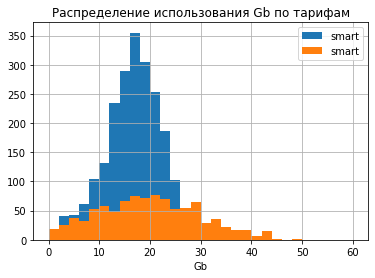

In [65]:
total_data_smart['gb_used'].hist(range=(0,60),bins=30, label='smart')
total_data_ultra['gb_used'].hist(range=(0,60),bins=30, label='smart')
plt.xlabel('Gb')
plt.title('Распределение использования Gb по тарифам')
plt.legend()
plt.show()

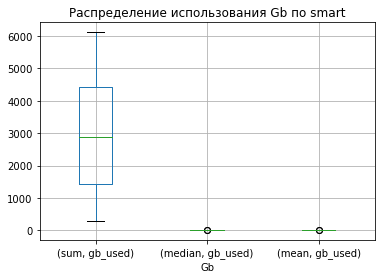

,sum,median,mean
,gb_used,gb_used,gb_used
count,12.000000,12.000000,12.000000
mean,3025.083333,15.250000,15.201231
std,1915.457100,2.927146,2.628222
min,297.000000,7.000000,8.735294
25%,1437.750000,15.500000,14.831575
50%,2897.000000,16.000000,15.938563
75%,4419.500000,17.000000,16.788090
max,6117.000000,18.000000,18.205357


In [66]:
gb_total_data_smart.boxplot()
plt.xlabel('Gb')
plt.title('Распределение использования Gb по smart')
plt.show()
gb_total_data_smart.describe()

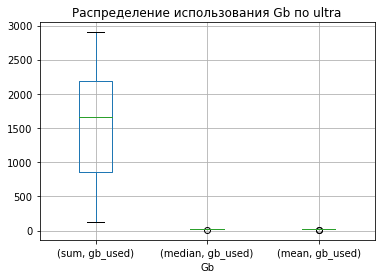

,sum,median,mean
,gb_used,gb_used,gb_used
count,12.000000,12.0000,12.000000
mean,1544.416667,17.8750,18.299673
std,904.586240,3.7058,2.893244
min,119.000000,7.5000,12.000000
25%,860.000000,17.7500,17.618562
50%,1666.000000,19.0000,19.373393
75%,2185.750000,20.0000,19.777211
max,2901.000000,22.0000,21.649254


In [67]:
gb_total_data_ultra.boxplot()
plt.xlabel('Gb')
plt.title('Распределение использования Gb по ultra')
plt.show()
gb_total_data_ultra.describe()

In [68]:
display(gb_total_data_smart.var()['sum'])
display(gb_total_data_smart.var()['mean'])
display(gb_total_data_smart.var()['median'])

gb_used    3.668976e+06
dtype: float64

gb_used    6.907553
dtype: float64

gb_used    8.568182
dtype: float64

In [69]:
display(gb_total_data_ultra.var()['sum'])
display(gb_total_data_ultra.var()['mean'])
display(gb_total_data_ultra.var()['median'])

gb_used    818276.265152
dtype: float64

gb_used    8.370859
dtype: float64

gb_used    13.732955
dtype: float64

In [70]:
total_cost_data_smart = total_data.query('tariff=="smart"').pivot_table(index=['tariff', 'monat'], values='total_cost', aggfunc=['sum','median' ,'mean'])
total_cost_data_ultra = total_data.query('tariff=="ultra"').pivot_table(index=['tariff', 'monat'], values='total_cost', aggfunc=['sum','median' ,'mean'])

In [71]:
display(total_cost_data_smart)
display(total_cost_data_ultra)

sum     median         mean
             total_cost total_cost   total_cost
tariff monat                                   
smart  1.0      24372.0      550.0   716.823529
       2.0      45421.0      550.0   783.120690
       3.0      81708.0      750.0  1061.142857
       4.0      98833.0      550.0   882.437500
       5.0     157212.0      825.0  1114.978723
       6.0     182440.0      756.0  1119.263804
       7.0     225239.0      750.0  1120.592040
       8.0     281110.0      950.0  1201.324786
       9.0     290484.0      750.0  1121.559846
       10.0    360636.0      953.0  1230.839590
       11.0    381685.0      950.0  1211.698413
       12.0    462294.0     1150.0  1375.875000

sum     median         mean
             total_cost total_cost   total_cost
tariff monat                                   
ultra  1.0      17550.0     1950.0  1950.000000
       2.0      47400.0     1950.0  1975.000000
       3.0      74550.0     1950.0  2014.864865
       4.0     106200.0     1950.0  2003.773585
       5.0     132150.0     1950.0  2064.843750
       6.0     165450.0     1950.0  2042.592593
       7.0     186900.0     1950.0  2123.863636
       8.0     214800.0     1950.0  2085.436893
       9.0     224550.0     1950.0  2022.972973
       10.0    244200.0     1950.0  2069.491525
       11.0    269850.0     1950.0  2091.860465
       12.0    285900.0     1950.0  2133.582090

In [72]:
total_data_smart=total_data.query('tariff=="smart"')
total_data_ultra=total_data.query('tariff=="ultra"')

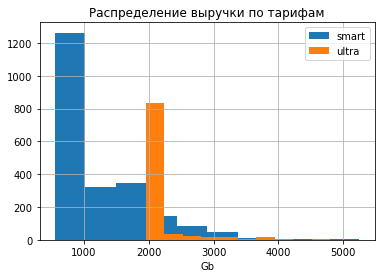

In [73]:
total_data_smart['total_cost'].hist(bins=10,label='smart')
total_data_ultra['total_cost'].hist(bins=10, label='ultra')
plt.xlabel('Gb')
plt.title('Распределение выручки по тарифам')
plt.legend()
plt.show()

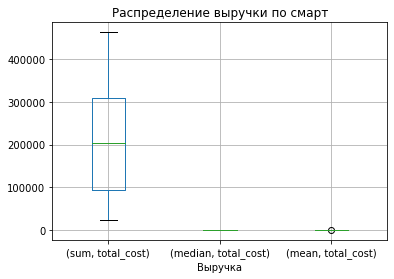

,sum,median,mean
,total_cost,total_cost,total_cost
count,12.000000,12.000000,12.000000
mean,215952.833333,790.333333,1078.304732
std,141764.071695,187.652645,192.562950
min,24372.000000,550.000000,716.823529
25%,94551.750000,700.000000,1016.466518
50%,203839.500000,753.000000,1119.927922
75%,308022.000000,950.000000,1203.918193
max,462294.000000,1150.000000,1375.875000


In [74]:
total_cost_data_smart.boxplot()
plt.xlabel('Выручка')
plt.title('Распределение выручки по смарт')
plt.show()
total_cost_data_smart.describe()

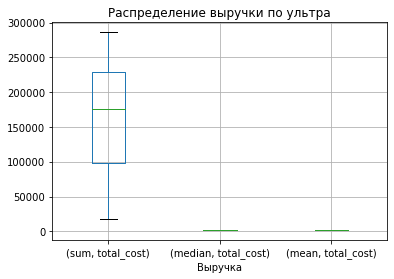

,sum,median,mean
,total_cost,total_cost,total_cost
count,12.000000,12.0,12.000000
mean,164125.000000,1950.0,2048.190198
std,88763.663481,0.0,57.042660
min,17550.000000,1950.0,1950.000000
25%,98287.500000,1950.0,2012.092045
50%,176175.000000,1950.0,2053.718171
75%,229462.500000,1950.0,2087.042786
max,285900.000000,1950.0,2133.582090


In [75]:
total_cost_data_ultra.boxplot()
plt.xlabel('Выручка')
plt.title('Распределение выручки по ультра')
plt.show()
total_cost_data_ultra.describe()

In [76]:
display(total_cost_data_smart.var()['mean'])
display(total_cost_data_smart.var()['sum'])
display(total_cost_data_smart.var()['median'])



total_cost    37080.489537
dtype: float64

total_cost    2.009705e+10
dtype: float64

total_cost    35213.515152
dtype: float64

In [77]:

display(total_cost_data_ultra.var()['mean'])
display(total_cost_data_ultra.var()['sum'])
display(total_cost_data_ultra.var()['median'])

total_cost    3253.86503
dtype: float64

total_cost    7.878988e+09
dtype: float64

total_cost    0.0
dtype: float64

3. Вывод - тариф смарт телефонные звонки с начало годо и до конца виден рост количества потраченных сообще ний от 941 м в январе до 22000 в декабре, такая же картина и у тарифа ультра с разницей в количестве использованных минут от 555 в я нваре и до 11000 в декабре. 
- тариф смарт отправленные сообщения с начало года и до конца виден рост количества потраченных сообщений от 620 шт. в январе до 12095	 в декабре, такая же картина и у тарифа ультра с разницей в количестве использованных сообщений от 304 в я нваре и до 8141 в декабре. 
- тариф смарт потраченных мегабай трафика с начало года и до конца виден рост количества  от 24372 gb. в январе до 462294	 в декабре, такая же картина и у тарифа ультра с разницей в количестве использованных gb от 17550 в я нваре и до 285900 в декабре. 
- тариф смарт выручка от трафика с начало года и до конца виден рост   от 716 в январе до 1375	 в декабре, такая же картина и у тарифа ультра с разницей в количестве  от 1950 в я нваре и до 2133.58 в декабре.

    Разброс

In [78]:
import math

In [79]:
# Дисперсия для генеральной совокупности n, для выбор n-1, степень свободы - для гс -0, для выборки
np.var(total_cost_data_ultra['mean'], ddof=1)


total_cost    3253.86503
dtype: float64

In [80]:
np.var(total_cost_data_smart['mean'], ddof=1)

total_cost    37080.489537
dtype: float64

In [81]:
# стандартное отклоненние(гс), для выбор среднеквадратическое отклонение
math.sqrt(np.var(total_cost_data_smart['mean'], ddof=1))


192.56294954274347

In [82]:
math.sqrt(np.var(total_cost_data_ultra['mean'], ddof=1))

57.04265974032173

4.Проверьте гипотезы

    4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова

Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Если p-value меньше порогового значения alpha, то гипотезу отвергаем. Иначе - не отвергаем.

In [83]:
from scipy import stats as st 

In [84]:
alpha = 0.05

In [85]:
ultra_data = total_data.query('tariff == "ultra"')
smart_data = total_data.query('tariff == "smart"')

In [86]:
results = st.ttest_ind(smart_data['total_cost'], ultra_data['total_cost'])

In [87]:
print('p-значение:', results.pvalue)

p-значение: 4.657090039411243e-235


In [88]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.


In [89]:
smart = total_data[total_data['tariff']=='smart']['total_cost'].mean()
ultra = total_data[total_data['tariff']=='ultra']['total_cost'].mean()

In [90]:
display(f'Средняя выручка от тарифа смарт -{smart} рублей')
display(f'Средняя выручка от тарифа ультра -{ultra} рублей')

'Средняя выручка от тарифа смарт -1165.7372919478182 рублей'

'Средняя выручка от тарифа ультра -2070.9779179810726 рублей'

    4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

 Для москвичей и не-москвичей. На них проверим нулевую гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [91]:
msc_data = total_data.query('city == "Москва"')
no_msc_data = total_data.query('city != "Москва"')

In [92]:
results_city = st.ttest_ind(msc_data['total_cost'], no_msc_data['total_cost'])

In [93]:
print('p-значение:', results_city.pvalue)

p-значение: 0.2251949609364987


In [94]:
if results_city.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не можем отвергнуть нулевую гипотезу.')

Не можем отвергнуть нулевую гипотезу.


In [95]:
city_tarif = total_data[['city', 'tariff', 'total_cost']]
display(city_tarif)

,city,tariff,total_cost
0,Краснодар,ultra,1950.0
1,Краснодар,ultra,1950.0
2,Краснодар,ultra,1950.0
3,Краснодар,ultra,1950.0
4,Краснодар,ultra,1950.0
...,...,...,...
3169,Владикавказ,smart,1750.0
3170,Пермь,smart,550.0
3171,Пермь,smart,1150.0
3172,Пермь,smart,1177.0


In [96]:
smart_Moscow = city_tarif.query('tariff =="smart" and city=="Москва"').pivot_table(index='city', values='total_cost', aggfunc=['mean'])

ultra_Moscow = city_tarif.query('tariff =="ultra" and city=="Москва"').pivot_table(index='city', values='total_cost', aggfunc=['mean'])


In [97]:
smart_City = city_tarif.query('tariff =="smart" and city!="Москва"').pivot_table(index='city', values='total_cost', aggfunc=['mean'])

ultra_City = city_tarif.query('tariff =="ultra" and city!="Москва"').pivot_table(index='city', values='total_cost', aggfunc=['mean'])

График средняя выручка пользователей из других регинов, тариф смарт

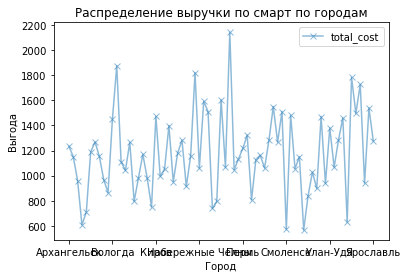

In [98]:
smart_City.plot(y='mean', style='x-', alpha=0.5)
plt.xlabel('Город')
plt.ylabel('Выгода')
plt.title('Распределение выручки по смарт по городам')
plt.show()

График средняя выручка пользователей из других регинов, тариф ультра

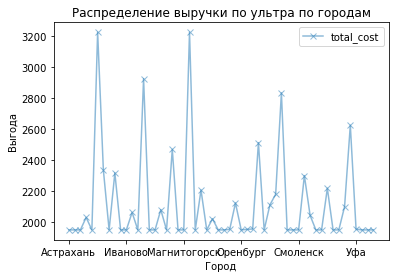

In [99]:
ultra_City.plot(y='mean', style='x-', alpha=0.5)
plt.xlabel('Город')
plt.ylabel('Выгода')
plt.title('Распределение выручки по ультра по городам')
plt.show()

In [100]:
display(f'Средняя выручка от тарифа смарт -{smart_Moscow} рублей')
display(f'Средняя выручка от тарифа ультра -{ultra_Moscow} рублей')

'Средняя выручка от тарифа смарт -               mean\n         total_cost\ncity               \nМосква  1120.997409 рублей'

'Средняя выручка от тарифа ультра -               mean\n         total_cost\ncity               \nМосква  2074.553571 рублей'

In [101]:
smart_City.columns = ['price']
mean_smart_city = smart_City['price'].mean()
display(f'Средняя выручка от тарифа смарт в дргугих городах -{mean_smart_city} рублей')

ultra_City.columns = ['price']
mean_ultra_city = ultra_City['price'].mean()
display(display(f'Средняя выручка от тарифа ультра в дргугих городах -{mean_ultra_city} рублей'))


'Средняя выручка от тарифа смарт в дргугих городах -1173.2327272899095 рублей'

'Средняя выручка от тарифа ультра в дргугих городах -2116.95036801231 рублей'

None

4. Вывод - средняя выручка от разных тарифов различается, однако если сравнивать по городам, то более обеспеченная Москва    больше прибыли не приносит.

5. Общий вывод - 
    1.Таблицы представленные ошибку имела - ошибка в интернет трафике- пользователь устанавливал соединение и авторизовался. Но трафик нулевой. И это аномалия, возможно, что она связана с техничесткими проблемами оператора., если не считать лишнего сстобца в таблице intenet c дублиющим столбцом id, тип данных изменил., имеются таблицы с информацией по использованию пользователями количества отправленных сообщений, сделанных звонков и потраченных Мб интренета в заисимости от тарифа за 2018 год.
    2. В представленных таблицах приведение типов данных произвел.
    Посчитал для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя - она указано в столбце total_cost таблицы total_data
    3. - тариф смарт телефонные звонки с начало годо и до конца виден рост количества потраченных сообще ний от 941 м в январе до 22000 в декабре, такая же картина и у тарифа ультра с разницей в количестве использованных минут от 555 в я нваре и до 11000 в декабре. 
- тариф смарт отправленные сообщения с начало года и до конца виден рост количества потраченных сообщений от 620 шт. в январе до 12095	 в декабре, такая же картина и у тарифа ультра с разницей в количестве использованных сообщений от 304 в я нваре и до 8141 в декабре. 
- тариф смарт потраченных мегабай трафика с начало года и до конца виден рост количества  от 24372 gb. в январе до 462294	 в декабре, такая же картина и у тарифа ультра с разницей в количестве использованных gb от 17550 в я нваре и до 285900 в декабре. 
- тариф смарт выручка от трафика с начало года и до конца виден рост   от 716 в январе до 1375	 в декабре, такая же картина и у тарифа ультра с разницей в количестве  от 1950 в я нваре и до 2133.58 в декабре.
4. По полученному анализу стало ясно что Средняя выручка тарифов различается.
Средняя выручка от тарифа смарт -1165.7372919478182 рублей'
'Средняя выручка от тарифа ультра -2070.9779179810726 рублей'
Срденяя выручка по Москве и другим городам -
'Средняя выручка от тарифа смарт - Москва  1120.997409 рублей'
Средняя выручка от тарифа смарт в дргугих городах -1173.2 рублей'
'Средняя выручка от тарифа ультра - Москва  2074.553571 рублей'
'Средняя выручка от тарифа ультра в дргугих городах -2116.9 рублей'